# Below code is for Cumulative weighted progress

In [1]:
# importing the excel file and setting the cut off date for future calcutaions

import pandas as pd
dfs = pd.read_excel('/Users/azharuddinmandal/Downloads/project_Ashifuddin/dataSet.xlsx')
cuttoff_date = '2023-01-31'
dfs.head()

,Document ID,Title,Current Revision,Current Client Revision,Client Document ID,Document Purpose,Client Action,Client Review Status,Discipline,Man Hours,...,Keywords,Client WBS,Document Need Translation,Work Pack ID,IFR Planned,IFR Forecast,IFR Actual,IFU Planned,IFU Forecast,IFU Actual
0,C5663/CS30/CAL/4500/3101,Static Calculation - Steel Structure for Main ...,,,7650-8320-CA-810-3101,Deliverable,2,,30,80,...,,AE302000,False,,2023-11-30,2023-11-30,,2023-12-20 00:00:00,2023-12-20 00:00:00,
1,C5663/CS30/CAL/4500/3201,Static Calculation - Steel Structure for Instr...,B,EO2,7650-8320-CA-810-3201,Deliverable,2,IN - 3,30,15,...,,AE300000,False,,2022-09-10,2022-09-10,2022-09-14 00:00:00,2022-09-30 00:00:00,2023-02-24 00:00:00,
2,C5663/CS30/CAL/4500/3301,Static Calculation - Steel Structure for PSV n...,,,7650-8320-CA-810-3301,Deliverable,2,,30,20,...,,AE302000,False,,2023-11-30,2023-11-30,,2023-12-20 00:00:00,2023-12-20 00:00:00,
3,C5663/CS30/CAL/4500/3401,Static Calculation - Steel Structure for Diame...,1,EA1,7650-8320-CA-810-3401,Deliverable,2,IN - 1,30,10,...,,AE300000,False,,2022-09-10,2022-09-10,2022-09-20 00:00:00,2022-09-30 00:00:00,2022-09-30 00:00:00,2022-10-21 00:00:00
4,C5663/CS30/CAL/4500/3501,Static Calculation - Steel Structure for Emerg...,2,EF1,7650-8320-CA-810-3501,Deliverable,2,,30,10,...,,AE300000,False,,2022-09-10,2022-09-10,2022-09-09 00:00:00,2022-09-30 00:00:00,2022-09-30 00:00:00,2022-10-12 00:00:00


In [2]:
# calculation of weights based on man hour

dfs["weight"] = ((dfs["Man Hours"]/dfs["Man Hours"].sum())*100).round(4)
dfs["weightIFR"] = ((dfs["Man Hours"]/dfs["Man Hours"].sum())*70).round(4)
dfs["weightIFU"] = ((dfs["Man Hours"]/dfs["Man Hours"].sum())*30).round(4)
dfs['WeightPerDiscipline'] = dfs['Man Hours'].groupby(dfs['Discipline']).transform('sum')
dfs["WeightPerDiscipline"] = ((dfs["Man Hours"]/dfs["WeightPerDiscipline"])*30).round(3)

In [3]:
# displaying the calculated weights with table 

dfs.head()

,Document ID,Title,Current Revision,Current Client Revision,Client Document ID,Document Purpose,Client Action,Client Review Status,Discipline,Man Hours,...,IFR Planned,IFR Forecast,IFR Actual,IFU Planned,IFU Forecast,IFU Actual,weight,weightIFR,weightIFU,WeightPerDiscipline
0,C5663/CS30/CAL/4500/3101,Static Calculation - Steel Structure for Main ...,,,7650-8320-CA-810-3101,Deliverable,2,,30,80,...,2023-11-30,2023-11-30,,2023-12-20 00:00:00,2023-12-20 00:00:00,,0.3922,0.2745,0.1177,5.418
1,C5663/CS30/CAL/4500/3201,Static Calculation - Steel Structure for Instr...,B,EO2,7650-8320-CA-810-3201,Deliverable,2,IN - 3,30,15,...,2022-09-10,2022-09-10,2022-09-14 00:00:00,2022-09-30 00:00:00,2023-02-24 00:00:00,,0.0735,0.0515,0.0221,1.016
2,C5663/CS30/CAL/4500/3301,Static Calculation - Steel Structure for PSV n...,,,7650-8320-CA-810-3301,Deliverable,2,,30,20,...,2023-11-30,2023-11-30,,2023-12-20 00:00:00,2023-12-20 00:00:00,,0.0980,0.0686,0.0294,1.354
3,C5663/CS30/CAL/4500/3401,Static Calculation - Steel Structure for Diame...,1,EA1,7650-8320-CA-810-3401,Deliverable,2,IN - 1,30,10,...,2022-09-10,2022-09-10,2022-09-20 00:00:00,2022-09-30 00:00:00,2022-09-30 00:00:00,2022-10-21 00:00:00,0.0490,0.0343,0.0147,0.677
4,C5663/CS30/CAL/4500/3501,Static Calculation - Steel Structure for Emerg...,2,EF1,7650-8320-CA-810-3501,Deliverable,2,,30,10,...,2022-09-10,2022-09-10,2022-09-09 00:00:00,2022-09-30 00:00:00,2022-09-30 00:00:00,2022-10-12 00:00:00,0.0490,0.0343,0.0147,0.677


In [4]:
# Aggregation of weight based on planned values 

dfp_IFR = dfs.groupby(dfs['IFR Planned'].dt.strftime('%Y-%m'))['weightIFR'].sum().reset_index()
dfp_IFR.rename(columns={'IFR Planned': 'date_month'}, inplace=True)

dfp_IFU = dfs.groupby(pd.to_datetime(dfs['IFU Planned'],errors='coerce').dt.strftime('%Y-%m'))['weightIFU'].sum().reset_index()
dfp_IFU.rename(columns={'IFU Planned': 'date_month'}, inplace=True)

dfp_IFR_IFU = dfp_IFR.merge(dfp_IFU, on='date_month', how='left')
dfp_IFR_IFU.fillna(0, inplace=True)
dfp_IFR_IFU['totalForecast'] = dfp_IFR_IFU['weightIFR'] + dfp_IFR_IFU['weightIFU']

dfp_IFR_IFU['totalRunningPLan'] = dfp_IFR_IFU['totalForecast'].cumsum()
dfp_IFR_IFU_Plan = dfp_IFR_IFU[["date_month", "totalRunningPLan"]]
dfp_IFR_IFU_Plan

,date_month,totalRunningPLan
0,2022-01,0.0137
1,2022-07,4.3905
2,2022-08,11.7173
3,2022-09,28.3534
4,2022-10,29.3161
5,2022-11,37.5645
6,2022-12,41.2814
7,2023-01,53.6891
8,2023-02,58.2643
9,2023-03,75.6742


In [5]:
# Aggregation of weight based on Forecasted values 

dff_IFR = dfs.groupby(dfs['IFR Forecast'].dt.strftime('%Y-%m'))['weightIFR'].sum().reset_index()
dff_IFR.rename(columns={'IFR Forecast': 'date_month'}, inplace=True)

dff_IFU = dfs.groupby(pd.to_datetime(dfs['IFU Forecast'],errors='coerce').dt.strftime('%Y-%m'))['weightIFU'].sum().reset_index()
dff_IFU.rename(columns={'IFU Forecast': 'date_month'}, inplace=True)

dff_IFR_IFU = dff_IFR.merge(dff_IFU, on='date_month', how='left')
dff_IFR_IFU.fillna(0, inplace=True)
dff_IFR_IFU['totalForecast'] = dff_IFR_IFU['weightIFR'] + dff_IFR_IFU['weightIFU']

dff_IFR_IFU['totalRunningForecast'] = dff_IFR_IFU['totalForecast'].cumsum()
dff_IFR_IFU_Forecast = dff_IFR_IFU[["date_month", "totalRunningForecast"]]
dff_IFR_IFU_Forecast

,date_month,totalRunningForecast
0,2022-01,0.0137
1,2022-07,4.3905
2,2022-08,11.7173
3,2022-09,27.6062
4,2022-10,28.3237
5,2022-11,35.3273
6,2022-12,38.2352
7,2023-01,53.0788
8,2023-02,57.9584
9,2023-03,75.7286


In [6]:
# Aggregation of weight based on Actual values 


dfa_IFR = dfs.groupby(pd.to_datetime(dfs['IFR Actual'],errors='coerce').dt.strftime('%Y-%m'))['weightIFR'].sum().reset_index()
dfa_IFR.rename(columns={'IFR Actual': 'date_month'}, inplace=True)

dfa_IFU = dfs.groupby(pd.to_datetime(dfs['IFU Actual'],errors='coerce').dt.strftime('%Y-%m'))['weightIFU'].sum().reset_index()
dfa_IFU.rename(columns={'IFU Actual': 'date_month'}, inplace=True)

dfa_IFR_IFU = dfa_IFR.merge(dfa_IFU, on='date_month', how='left')
dfa_IFR_IFU.fillna(0, inplace=True)
dfa_IFR_IFU['totalActual'] = dfa_IFR_IFU['weightIFR'] + dfa_IFR_IFU['weightIFU']

dfa_IFR_IFU['totalRunningActual'] = dfa_IFR_IFU['totalActual'].cumsum()
dfa_IFR_IFU_Actual = dfa_IFR_IFU[["date_month", "totalRunningActual"]]
dfa_IFR_IFU_Actual

,date_month,totalRunningActual
0,2022-07,8.8616
1,2022-08,16.3459
2,2022-09,25.9125
3,2022-10,29.6377
4,2022-11,37.0457
5,2022-12,42.0005
6,2023-01,46.2452


In [7]:
# merging all the Aggregated weight's of planned, forecated and actual weight's in single table

df_final = dfp_IFR_IFU_Plan.merge(dff_IFR_IFU_Forecast, on='date_month', how='left')
df_final = df_final.merge(dfa_IFR_IFU_Actual, on='date_month', how='left')
df_final

,date_month,totalRunningPLan,totalRunningForecast,totalRunningActual
0,2022-01,0.0137,0.0137,NaN
1,2022-07,4.3905,4.3905,8.8616
2,2022-08,11.7173,11.7173,16.3459
3,2022-09,28.3534,27.6062,25.9125
4,2022-10,29.3161,28.3237,29.6377
5,2022-11,37.5645,35.3273,37.0457
6,2022-12,41.2814,38.2352,42.0005
7,2023-01,53.6891,53.0788,46.2452
8,2023-02,58.2643,57.9584,NaN
9,2023-03,75.6742,75.7286,NaN


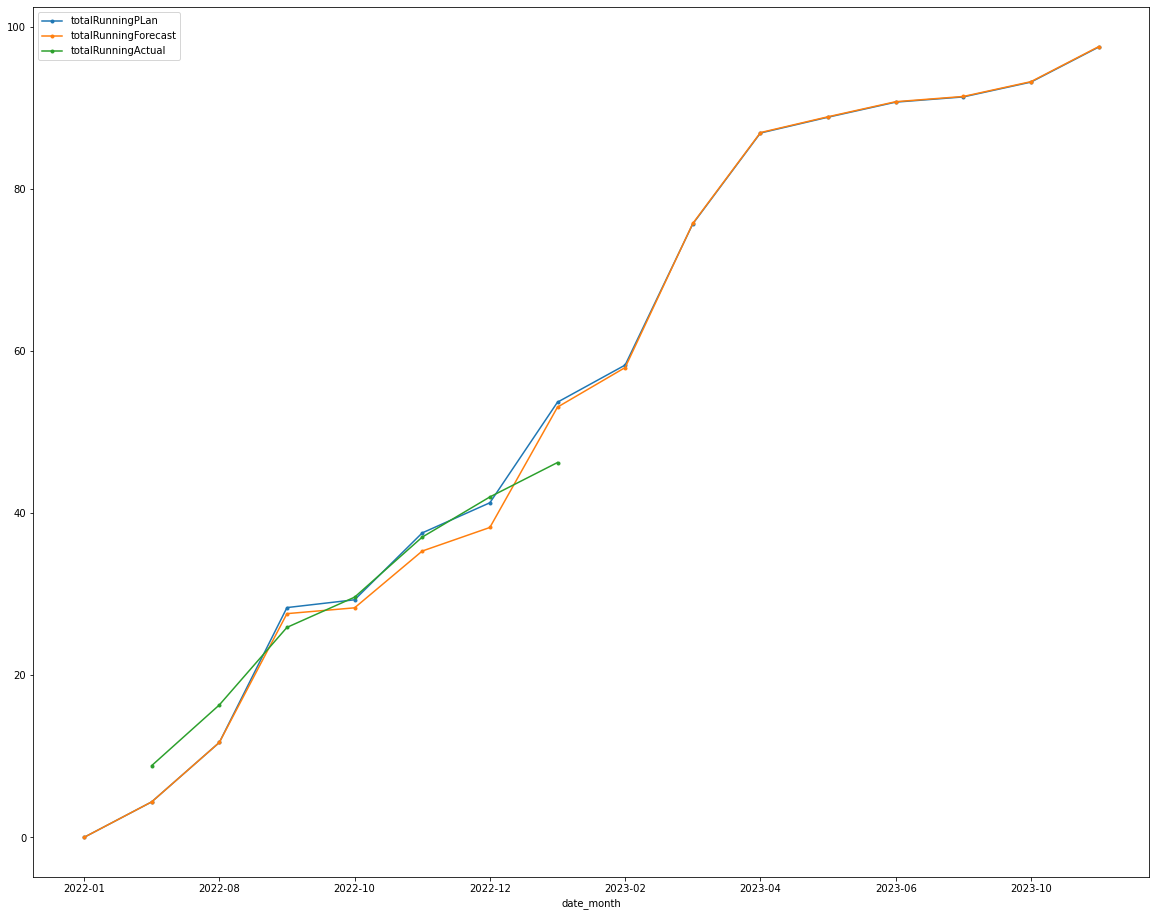

In [8]:
# Ploting the Cumulative weighted progress report.

fig = df_final.plot.line(x='date_month',figsize=(20,16),style='.-').get_figure()
fig.savefig('test.pdf')

# Below code is for Cumulative weighted progress till the cuttoff month

In [9]:
# maping DisciplineName with Discipline code 
details = {
    'DisciplineName' : ['Project Engineering', 'Structural', 'Civil', 'Piping','Electrical','Instrumetalional And Control','Equipment','Process','Tank','Process Safety'],
    'Discipline' : ['21', '30', '31', '32', '33', '34', '35', '36', '37', '38']
}

In [10]:
# creating pandas dataframe from DisciplineName with Discipline code

FinalDf = pd.DataFrame(details)
FinalDf['Discipline'] = FinalDf['Discipline'].astype('int64')
FinalDf

,DisciplineName,Discipline
0,Project Engineering,21
1,Structural,30
2,Civil,31
3,Piping,32
4,Electrical,33
5,Instrumetalional And Control,34
6,Equipment,35
7,Process,36
8,Tank,37
9,Process Safety,38


In [11]:
# adding man hours to the dataframe

Man_Hours = dfs.groupby('Discipline')['Man Hours'].sum().reset_index()   
FinalDf = FinalDf.merge(Man_Hours,on='Discipline', how='left')
FinalDf

,DisciplineName,Discipline,Man Hours
0,Project Engineering,21,470
1,Structural,30,443
2,Civil,31,244
3,Piping,32,2156
4,Electrical,33,1072
5,Instrumetalional And Control,34,1744
6,Equipment,35,48
7,Process,36,732
8,Tank,37,12857
9,Process Safety,38,632


In [12]:
# Weighted progress planed based on per discipline or department

IFR_Plan = (dfs.where(dfs['IFR Planned'] < cuttoff_date)).groupby('Discipline')['Man Hours'].sum().reset_index()
IFU_Plan = (dfs.where(pd.to_datetime(dfs['IFU Planned'],errors='coerce') < cuttoff_date)).groupby('Discipline')['Man Hours'].sum().reset_index()

Plan = IFR_Plan.merge(IFU_Plan, on='Discipline', how='left')
Plan['plan'] = Plan['Man Hours_x']*.7 + Plan['Man Hours_y']*.3
Plan = Plan[["Discipline", "plan"]]
FinalDf = FinalDf.merge(Plan,on='Discipline', how='left')
FinalDf

,DisciplineName,Discipline,Man Hours,plan
0,Project Engineering,21,470,290.0
1,Structural,30,443,87.0
2,Civil,31,244,83.6
3,Piping,32,2156,332.0
4,Electrical,33,1072,880.5
5,Instrumetalional And Control,34,1744,832.0
6,Equipment,35,48,48.0
7,Process,36,732,561.6
8,Tank,37,12857,5483.4
9,Process Safety,38,632,532.0


In [13]:
# Weighted progress Forecast based on per discipline or department

IFR_Forecast = (dfs.where(dfs['IFR Forecast'] < cuttoff_date)).groupby('Discipline')['Man Hours'].sum().reset_index()
IFU_Forecast = (dfs.where(pd.to_datetime(dfs['IFU Forecast'],errors='coerce') < cuttoff_date)).groupby('Discipline')['Man Hours'].sum().reset_index()

Forecast = IFR_Forecast.merge(IFR_Forecast, on='Discipline', how='left')
Forecast['forecast'] = Forecast['Man Hours_x']*.7 + Forecast['Man Hours_y']*.3
Forecast = Forecast[["Discipline", "forecast"]]
FinalDf = FinalDf.merge(Forecast,on='Discipline', how='left')
FinalDf

,DisciplineName,Discipline,Man Hours,plan,forecast
0,Project Engineering,21,470,290.0,326.0
1,Structural,30,443,87.0,87.0
2,Civil,31,244,83.6,104.0
3,Piping,32,2156,332.0,342.0
4,Electrical,33,1072,880.5,942.0
5,Instrumetalional And Control,34,1744,832.0,1000.0
6,Equipment,35,48,48.0,48.0
7,Process,36,732,561.6,564.0
8,Tank,37,12857,5483.4,5772.0
9,Process Safety,38,632,532.0,568.0


In [14]:
# Weighted progress Actual based on per discipline or department

IFR_Actual = (dfs.where(pd.to_datetime(dfs['IFR Actual'],errors='coerce') < cuttoff_date)).groupby('Discipline')['Man Hours'].sum().reset_index()
IFU_Actual = (dfs.where(pd.to_datetime(dfs['IFU Actual'],errors='coerce') < cuttoff_date)).groupby('Discipline')['Man Hours'].sum().reset_index()

Actual = IFR_Actual.merge(IFU_Actual, on='Discipline', how='left')
Actual['actual'] = Actual['Man Hours_x']*.7 + Actual['Man Hours_y']*.3
Actual = Actual[["Discipline", "actual"]]
FinalDf = FinalDf.merge(Actual,on='Discipline', how='left')
FinalDf

,DisciplineName,Discipline,Man Hours,plan,forecast,actual
0,Project Engineering,21,470,290.0,326.0,304.4
1,Structural,30,443,87.0,87.0,82.5
2,Civil,31,244,83.6,104.0,77.6
3,Piping,32,2156,332.0,342.0,618.4
4,Electrical,33,1072,880.5,942.0,861.0
5,Instrumetalional And Control,34,1744,832.0,1000.0,754.0
6,Equipment,35,48,48.0,48.0,48.0
7,Process,36,732,561.6,564.0,512.8
8,Tank,37,12857,5483.4,5772.0,5755.0
9,Process Safety,38,632,532.0,568.0,418.4


In [15]:
# Merging all the progress for the cut off date.

FinalDf['Deviation Plan'] = FinalDf['actual'] - FinalDf['plan']
FinalDf['Deviation Forecast'] = FinalDf['actual'] - FinalDf['forecast']
FinalDf

,DisciplineName,Discipline,Man Hours,plan,forecast,actual,Deviation Plan,Deviation Forecast
0,Project Engineering,21,470,290.0,326.0,304.4,14.4,-21.6
1,Structural,30,443,87.0,87.0,82.5,-4.5,-4.5
2,Civil,31,244,83.6,104.0,77.6,-6.0,-26.4
3,Piping,32,2156,332.0,342.0,618.4,286.4,276.4
4,Electrical,33,1072,880.5,942.0,861.0,-19.5,-81.0
5,Instrumetalional And Control,34,1744,832.0,1000.0,754.0,-78.0,-246.0
6,Equipment,35,48,48.0,48.0,48.0,0.0,0.0
7,Process,36,732,561.6,564.0,512.8,-48.8,-51.2
8,Tank,37,12857,5483.4,5772.0,5755.0,271.6,-17.0
9,Process Safety,38,632,532.0,568.0,418.4,-113.6,-149.6


# Below code is for Cumulative weighted progress for the cuttoff month

In [16]:
# creating pandas dataframe from DisciplineName with Discipline code

df = pd.DataFrame(details)
FinalDf_month = pd.DataFrame(details)
FinalDf_month['Discipline'] = FinalDf_month['Discipline'].astype('int64')
FinalDf_month

,DisciplineName,Discipline
0,Project Engineering,21
1,Structural,30
2,Civil,31
3,Piping,32
4,Electrical,33
5,Instrumetalional And Control,34
6,Equipment,35
7,Process,36
8,Tank,37
9,Process Safety,38


In [17]:
# Weighted progress planed based on per discipline or department for the cut of month 

IFR_Plan = (dfs.where(dfs['IFR Planned'].dt.strftime('%Y-%m') == cuttoff_date[0:7])).groupby('Discipline')['Man Hours'].sum().reset_index()
IFU_Plan = (dfs.where(pd.to_datetime(dfs['IFU Planned'],errors='coerce').dt.strftime('%Y-%m') == cuttoff_date[0:7])).groupby('Discipline')['Man Hours'].sum().reset_index()

Plan_month = IFR_Plan.merge(IFU_Plan, on='Discipline', how='outer').fillna(0)
Plan_month['planMonth'] = Plan_month['Man Hours_x']*.7 + Plan_month['Man Hours_y']*.3
Plan_month = Plan_month[["Discipline", "planMonth"]]
FinalDf_month = FinalDf_month.merge(Plan_month,on='Discipline', how='left').fillna(0)
FinalDf_month

,DisciplineName,Discipline,planMonth
0,Project Engineering,21,0.0
1,Structural,30,0.0
2,Civil,31,62.4
3,Piping,32,44.8
4,Electrical,33,0.0
5,Instrumetalional And Control,34,0.0
6,Equipment,35,0.0
7,Process,36,0.0
8,Tank,37,2423.5
9,Process Safety,38,0.0


In [18]:
# Weighted progress Forecast based on per discipline or department for the cut of month 

IFR_Forecast = (dfs.where(dfs['IFR Forecast'].dt.strftime('%Y-%m') == cuttoff_date[0:7])).groupby('Discipline')['Man Hours'].sum().reset_index()
IFU_Forecast = (dfs.where(pd.to_datetime(dfs['IFU Forecast'],errors='coerce').dt.strftime('%Y-%m') == cuttoff_date[0:7])).groupby('Discipline')['Man Hours'].sum().reset_index()

Forecast_month = IFR_Forecast.merge(IFU_Forecast, on='Discipline', how='outer').fillna(0)
Forecast_month['forecastMonth'] = Forecast_month['Man Hours_x']*.7 + Forecast_month['Man Hours_y']*.3
Forecast_month = Forecast_month[["Discipline", "forecastMonth"]]
FinalDf_month = FinalDf_month.merge(Forecast_month,on='Discipline', how='left').fillna(0)
FinalDf_month

,DisciplineName,Discipline,planMonth,forecastMonth
0,Project Engineering,21,0.0,14.4
1,Structural,30,0.0,0.0
2,Civil,31,62.4,78.8
3,Piping,32,44.8,44.4
4,Electrical,33,0.0,57.9
5,Instrumetalional And Control,34,0.0,36.0
6,Equipment,35,0.0,4.8
7,Process,36,0.0,0.0
8,Tank,37,2423.5,2752.8
9,Process Safety,38,0.0,38.4


In [19]:
# Weighted progress Actual based on per discipline or department for the cut of month 

IFR_Actual = (dfs.where(pd.to_datetime(dfs['IFR Actual'],errors='coerce').dt.strftime('%Y-%m') == cuttoff_date[0:7])).groupby('Discipline')['Man Hours'].sum().reset_index()
IFU_Actual = (dfs.where(pd.to_datetime(dfs['IFU Actual'],errors='coerce').dt.strftime('%Y-%m') == cuttoff_date[0:7])).groupby('Discipline')['Man Hours'].sum().reset_index()

Actual_month = IFR_Actual.merge(IFU_Forecast, on='Discipline', how='outer').fillna(0)
Actual_month['actualMonth'] = Actual_month['Man Hours_x']*.7 + Actual_month['Man Hours_y']*.3
Actual_month = Actual_month[["Discipline", "actualMonth"]]
FinalDf_month = FinalDf_month.merge(Actual_month,on='Discipline', how='left').fillna(0)
FinalDf_month

,DisciplineName,Discipline,planMonth,forecastMonth,actualMonth
0,Project Engineering,21,0.0,14.4,14.4
1,Structural,30,0.0,0.0,0.0
2,Civil,31,62.4,78.8,84.4
3,Piping,32,44.8,44.4,24.8
4,Electrical,33,0.0,57.9,87.3
5,Instrumetalional And Control,34,0.0,36.0,120.0
6,Equipment,35,0.0,4.8,4.8
7,Process,36,0.0,0.0,0.0
8,Tank,37,2423.5,2752.8,874.7
9,Process Safety,38,0.0,38.4,21.6


In [20]:
# Merging all the progress for the cut off date.

FinalDf_month['Deviation Plan Month'] = FinalDf_month['actualMonth'] - FinalDf_month['planMonth']
FinalDf_month['Deviation Forecast Month'] = FinalDf_month['actualMonth'] - FinalDf_month['forecastMonth']
FinalDf_month

,DisciplineName,Discipline,planMonth,forecastMonth,actualMonth,Deviation Plan Month,Deviation Forecast Month
0,Project Engineering,21,0.0,14.4,14.4,14.4,0.0
1,Structural,30,0.0,0.0,0.0,0.0,0.0
2,Civil,31,62.4,78.8,84.4,22.0,5.6
3,Piping,32,44.8,44.4,24.8,-20.0,-19.6
4,Electrical,33,0.0,57.9,87.3,87.3,29.4
5,Instrumetalional And Control,34,0.0,36.0,120.0,120.0,84.0
6,Equipment,35,0.0,4.8,4.8,4.8,0.0
7,Process,36,0.0,0.0,0.0,0.0,0.0
8,Tank,37,2423.5,2752.8,874.7,-1548.8,-1878.1
9,Process Safety,38,0.0,38.4,21.6,21.6,-16.8


In [21]:
# Creating the final dataframe merging Cumulative weighted progress and Monthly weighted progress

FinalDf = FinalDf.merge(FinalDf_month, on=['DisciplineName','Discipline'], how='outer').fillna(0)

In [22]:
# adding the column values and creating the final added values.

sum_row = FinalDf.sum(axis='rows')
sum_row = pd.DataFrame(sum_row).transpose()
sum_row['DisciplineName'] = ''
sum_row['Discipline'] = 'SUM'
sum_row
# adding the sumed row to the final dataframe 
FinalDf_to_save = pd.concat([FinalDf, sum_row], sort=False)

In [23]:
#saving the output table as excel file
FinalDf_to_save.to_excel("output.xlsx",index=False)
FinalDf_to_save

,DisciplineName,Discipline,Man Hours,plan,forecast,actual,Deviation Plan,Deviation Forecast,planMonth,forecastMonth,actualMonth,Deviation Plan Month,Deviation Forecast Month
0,Project Engineering,21,470,290.0,326.0,304.4,14.4,-21.6,0.0,14.4,14.4,14.4,0.0
1,Structural,30,443,87.0,87.0,82.5,-4.5,-4.5,0.0,0.0,0.0,0.0,0.0
2,Civil,31,244,83.6,104.0,77.6,-6.0,-26.4,62.4,78.8,84.4,22.0,5.6
3,Piping,32,2156,332.0,342.0,618.4,286.4,276.4,44.8,44.4,24.8,-20.0,-19.6
4,Electrical,33,1072,880.5,942.0,861.0,-19.5,-81.0,0.0,57.9,87.3,87.3,29.4
5,Instrumetalional And Control,34,1744,832.0,1000.0,754.0,-78.0,-246.0,0.0,36.0,120.0,120.0,84.0
6,Equipment,35,48,48.0,48.0,48.0,0.0,0.0,0.0,4.8,4.8,4.8,0.0
7,Process,36,732,561.6,564.0,512.8,-48.8,-51.2,0.0,0.0,0.0,0.0,0.0
8,Tank,37,12857,5483.4,5772.0,5755.0,271.6,-17.0,2423.5,2752.8,874.7,-1548.8,-1878.1
9,Process Safety,38,632,532.0,568.0,418.4,-113.6,-149.6,0.0,38.4,21.6,21.6,-16.8


In [24]:
#displying the final table in more symetrical way

FinalDf_to_save.style.hide()

DisciplineName,Discipline,Man Hours,plan,forecast,actual,Deviation Plan,Deviation Forecast,planMonth,forecastMonth,actualMonth,Deviation Plan Month,Deviation Forecast Month
Project Engineering,21,470,290.000000,326.000000,304.400000,14.400000,-21.600000,0.000000,14.400000,14.400000,14.400000,0.000000
Structural,30,443,87.000000,87.000000,82.500000,-4.500000,-4.500000,0.000000,0.000000,0.000000,0.000000,0.000000
Civil,31,244,83.600000,104.000000,77.600000,-6.000000,-26.400000,62.400000,78.800000,84.400000,22.000000,5.600000
Piping,32,2156,332.000000,342.000000,618.400000,286.400000,276.400000,44.800000,44.400000,24.800000,-20.000000,-19.600000
Electrical,33,1072,880.500000,942.000000,861.000000,-19.500000,-81.000000,0.000000,57.900000,87.300000,87.300000,29.400000
Instrumetalional And Control,34,1744,832.000000,1000.000000,754.000000,-78.000000,-246.000000,0.000000,36.000000,120.000000,120.000000,84.000000
Equipment,35,48,48.000000,48.000000,48.000000,0.000000,0.000000,0.000000,4.800000,4.800000,4.800000,0.000000
Process,36,732,561.600000,564.000000,512.800000,-48.800000,-51.200000,0.000000,0.000000,0.000000,0.000000,0.000000
Tank,37,12857,5483.400000,5772.000000,5755.000000,271.600000,-17.000000,2423.500000,2752.800000,874.700000,-1548.800000,-1878.100000
Process Safety,38,632,532.000000,568.000000,418.400000,-113.600000,-149.600000,0.000000,38.400000,21.600000,21.600000,-16.800000
